<a href="https://colab.research.google.com/github/ShashwathShinde6/Machine-Learning/blob/master/Wine_Stuff_(Skill).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science using Python**

---

##Experiment 1

###Importing Wine Datasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
red = pd.read_csv('/content/winequality-red.csv', delimiter = ';')
white = pd.read_csv('/content/winequality-white.csv', delimiter = ';')

### Red Dataset Information

In [ ]:
red.head()

In [ ]:
red.describe()

In [ ]:
red.info()

In [ ]:
red.shape

In [ ]:
red.size

### White Dataset Information

In [ ]:
white.head()

NameError: name 'white' is not defined

In [ ]:
white.describe()

In [ ]:
white.info()

In [ ]:
white.shape

In [ ]:
white.size

### Merging Wine Datasets

In [ ]:
red['type'] = 'red'
white['type'] = 'white'

df = pd.concat([red, white], axis=0, ignore_index=True)
df

## Experiment 2

###Handling Missing Values

In [ ]:
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


###Dropping Duplicate Values

In [ ]:
df.duplicated().sum()

np.int64(1177)

In [ ]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

np.int64(0)

### Handling Outliers

In [ ]:
q1 = df["alcohol"].quantile(0.25)
q3 = df["alcohol"].quantile(0.75)

In [ ]:
iqr = q3 - q1

In [ ]:
df = df[(df["alcohol"] > q1 - 1.5 * iqr) & (df["alcohol"] < q3 + 1.5 * iqr)]

## Experiment 3

### Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['type_label_encoded'] = le.fit_transform(df['type'])

<ipython-input-23-43fcf52ae86a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type_label_encoded'] = le.fit_transform(df['type'])


In [ ]:
df[['type', 'type_label_encoded']]

,type,type_label_encoded
0,red,0
1,red,0
2,red,0
3,red,0
5,red,0
...,...,...
6492,white,1
6493,white,1
6494,white,1
6495,white,1


### One-Hot Encoder

In [ ]:
one_hot_encoded = pd.get_dummies(df['type'], prefix='type')

In [ ]:
df = df.join(one_hot_encoded)

In [ ]:
df[['type', 'type_red', 'type_white']]

,type,type_red,type_white
0,red,True,False
1,red,True,False
2,red,True,False
3,red,True,False
5,red,True,False
...,...,...,...
6492,white,False,True
6493,white,False,True
6494,white,False,True
6495,white,False,True


### Ordinal Encoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder()

In [ ]:
df['quality_ordinal_encoded'] = oe.fit_transform(df[['quality']])

In [ ]:
df[['quality', 'quality_ordinal_encoded']]

,quality,quality_ordinal_encoded
0,5,2.0
1,5,2.0
2,5,2.0
3,6,3.0
5,5,2.0
...,...,...
6492,6,3.0
6493,5,2.0
6494,6,3.0
6495,7,4.0


### Target Encoder

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
te = ce.TargetEncoder(cols=['type'])

In [ ]:
df['type_target_encoded'] = te.fit_transform(df['type'], df['quality'])

In [ ]:
df[["type", "type_target_encoded"]]

,type,type_target_encoded
0,red,5.623711
1,red,5.623711
2,red,5.623711
3,red,5.623711
5,red,5.623711
...,...,...
6492,white,5.854835
6493,white,5.854835
6494,white,5.854835
6495,white,5.854835


### Binary Encoder

In [ ]:
import category_encoders as ce

In [ ]:
be = ce.BinaryEncoder(cols=['type'])

In [ ]:
df_binary = be.fit_transform(df)

In [ ]:
df_binary[['type_0', 'type_1']]

,type_0,type_1
0,0,1
1,0,1
2,0,1
3,0,1
5,0,1
...,...,...
6492,1,0
6493,1,0
6494,1,0
6495,1,0


### Frequency Encoder

In [ ]:
fe = df['type'].value_counts() / len(df)

In [ ]:
df['type_frequency_encoded'] = df['type'].map(fe)

In [ ]:
df[['type', 'type_frequency_encoded']]

,type,type_frequency_encoded
0,red,0.255311
1,red,0.255311
2,red,0.255311
3,red,0.255311
5,red,0.255311
...,...,...
6492,white,0.744689
6493,white,0.744689
6494,white,0.744689
6495,white,0.744689


## Experiment 4

### Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
numeric_cols = df.select_dtypes(include=['float64']).columns

In [ ]:
df = df.copy()

In [ ]:
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_label_encoded,type_red,type_white,quality_ordinal_encoded,type_target_encoded,type_frequency_encoded
0,0.305085,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.225806,5,red,0,True,False,0.333333,0.0,0.0
1,0.338983,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.290323,5,red,0,True,False,0.333333,0.0,0.0
2,0.338983,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.290323,5,red,0,True,False,0.333333,0.0,0.0
3,0.627119,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.290323,6,red,0,True,False,0.500000,0.0,0.0
5,0.305085,0.386667,0.000000,0.018405,0.109635,0.041667,0.078341,0.206092,0.612403,0.191011,0.225806,5,red,0,True,False,0.333333,0.0,0.0


### Standardization Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
numeric_cols = df.select_dtypes(include=['float64']).columns

In [ ]:
scaled_wines = df.copy()

In [ ]:
scaled_wines[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
scaled_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_label_encoded,type_red,type_white,quality_ordinal_encoded,type_target_encoded,type_frequency_encoded
0,0.141867,2.115169,-2.164922,-0.699551,0.524088,-1.069277,-1.411230,1.101197,1.779239,0.178379,-0.969599,5,red,0,True,False,-0.904652,-1.707861,-1.707861
1,0.446215,3.185018,-2.164922,-0.543997,1.120951,-0.282968,-0.829949,0.763952,-0.154103,0.980069,-0.631884,5,red,0,True,False,-0.904652,-1.707861,-1.707861
2,0.446215,2.471786,-1.892974,-0.610663,0.958170,-0.844618,-1.058938,0.831401,0.220092,0.779646,-0.631884,5,red,0,True,False,-0.904652,-1.707861,-1.707861
3,3.033171,-0.381144,1.642346,-0.699551,0.496957,-0.732288,-0.953251,1.168646,-0.403567,0.311994,-0.631884,6,red,0,True,False,0.232094,-1.707861,-1.707861
5,0.141867,1.877425,-2.164922,-0.721773,0.496957,-0.956947,-1.305542,1.101197,1.779239,0.178379,-0.969599,5,red,0,True,False,-0.904652,-1.707861,-1.707861


##Experiments 5 & 6

<ipython-input-56-3450c32338ef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y='alcohol', data=avg_alcohol, palette='viridis')


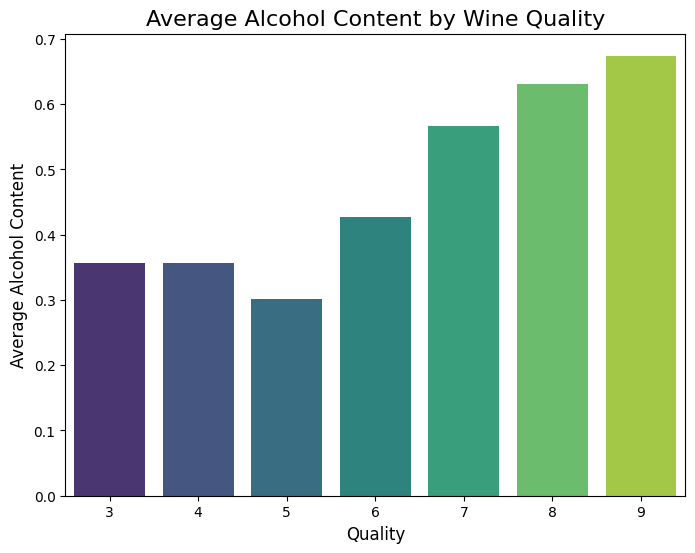

In [ ]:
avg_alcohol = df.groupby('quality')['alcohol'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='quality', y='alcohol', data=avg_alcohol, palette='viridis')

plt.title('Average Alcohol Content by Wine Quality', fontsize=16)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Average Alcohol Content', fontsize=12)

plt.show()

<ipython-input-57-9d2248d5f174>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['fixed acidity'], df['pH'], s = 5, alpha=0.5, cmap='ocean')


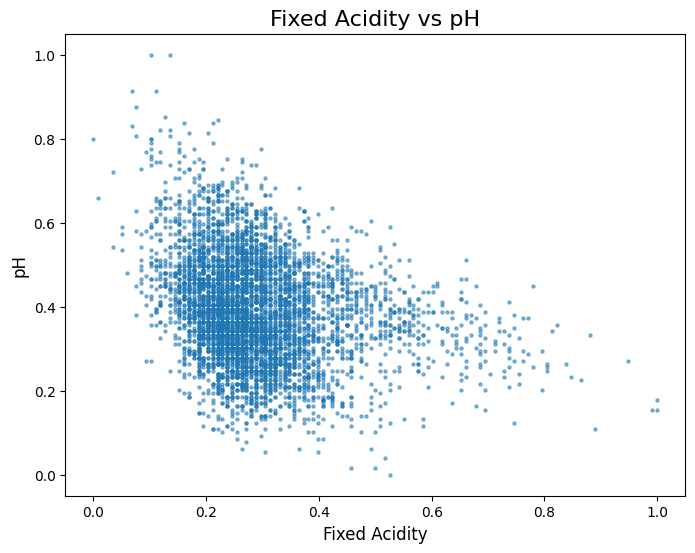

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['fixed acidity'], df['pH'], s = 5, alpha=0.5, cmap='ocean')

plt.title('Fixed Acidity vs pH', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=12)
plt.ylabel('pH', fontsize=12)

plt.show()

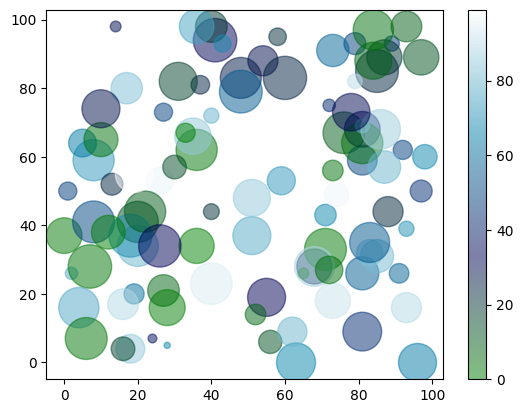

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randint(100, size=(100))
y = np.random.randint(100, size=(100))
colors = np.random.randint(100, size=(100))
sizes = 10 * np.random.randint(100, size=(100))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='ocean')

plt.colorbar()

plt.show()

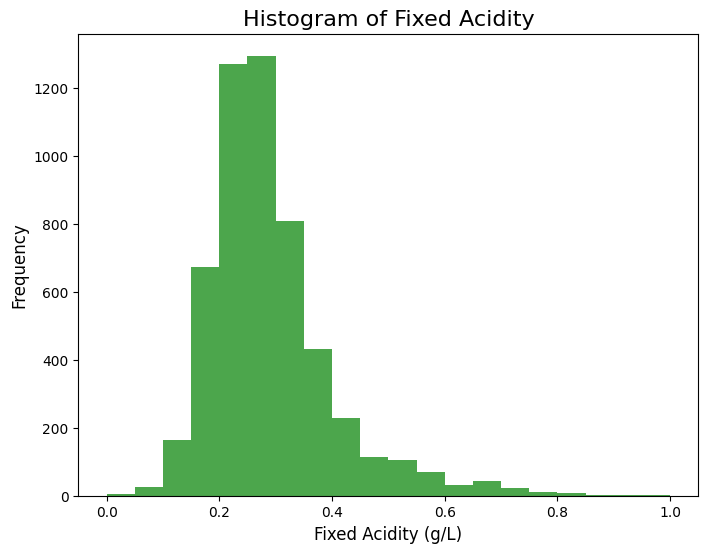

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['fixed acidity'], bins=20, alpha=0.7, color='green')

plt.title('Histogram of Fixed Acidity', fontsize=16)
plt.xlabel('Fixed Acidity (g/L)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

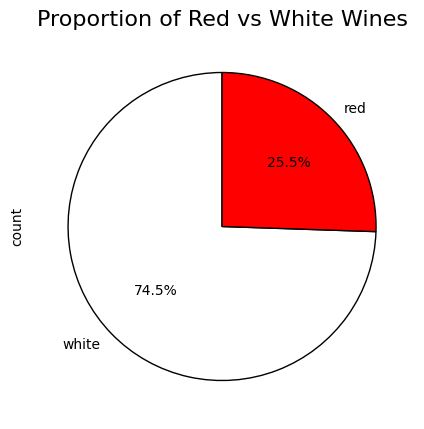

In [ ]:
wine_type_counts = df['type'].value_counts()

plt.figure(figsize=(5, 5))
wine_type_counts.plot.pie(autopct='%1.1f%%', colors=['white', 'red'], startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title('Proportion of Red vs White Wines', fontsize=16)

plt.show()

<ipython-input-61-abe666e7c890>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="type", y="volatile acidity", palette="coolwarm")


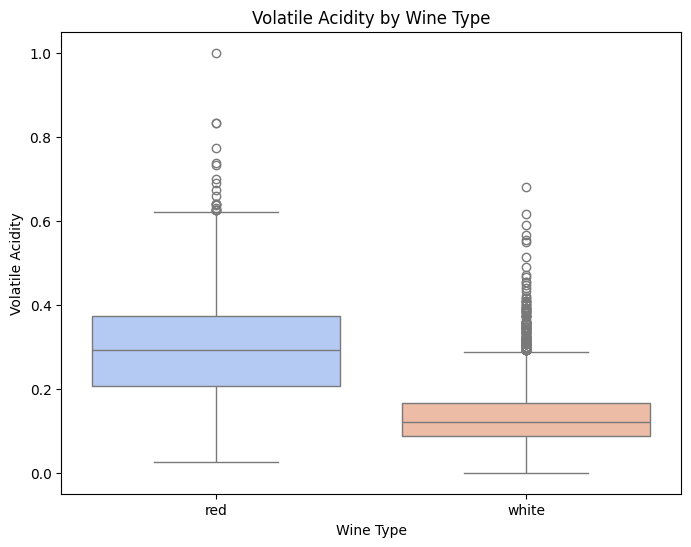

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="type", y="volatile acidity", palette="coolwarm")
plt.title("Volatile Acidity by Wine Type")
plt.xlabel("Wine Type")
plt.ylabel("Volatile Acidity")
plt.show()

## Experiment 7 & 8

### Information Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
X = df.drop(columns=["quality", "type", "type_label_encoded", "type_red", "type_white", "quality_ordinal_encoded"])
y = df["type_label_encoded"]

In [ ]:
info_gain = mutual_info_classif(X, y)

In [ ]:
sorted_features = sorted(zip(X.columns, info_gain), key=lambda x: x[1], reverse=True)

In [ ]:
print("Feature Information Gain Scores:")
for feature, score in sorted_features:
    print(f"{feature}: {score:.4f}")

Feature Information Gain Scores:
type_frequency_encoded: 0.5692
type_target_encoded: 0.5690
chlorides: 0.3506
total sulfur dioxide: 0.3447
volatile acidity: 0.2304
residual sugar: 0.2044
free sulfur dioxide: 0.1544
density: 0.1461
sulphates: 0.1444
fixed acidity: 0.1233
citric acid: 0.1090
pH: 0.0554
alcohol: 0.0164


### Chi-Square Test

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
X = df.drop(columns=["quality", "type", "type_label_encoded", "type_red", "type_white", "quality_ordinal_encoded"])
y = df["type_label_encoded"]

In [ ]:
chi2_selector = SelectKBest(score_func=chi2, k="all")
chi2_selector.fit(X, y)

SelectKBest(k='all', score_func=<function chi2 at 0x7bd5770b9760>)

In [ ]:
chi2_scores = chi2_selector.scores_

In [ ]:
sorted_features = sorted(zip(X.columns, chi2_scores), key=lambda x: x[1], reverse=True)

In [ ]:
print("Feature Chi-Square Scores:")
for feature, score in sorted_features:
    print(f"{feature}: {score:.4f}")

Feature Chi-Square Scores:
type_target_encoded: 1358.0000
type_frequency_encoded: 1358.0000
total sulfur dioxide: 176.0704
volatile acidity: 158.3416
chlorides: 62.7779
fixed acidity: 53.9329
sulphates: 51.3160
free sulfur dioxide: 43.6553
residual sugar: 40.1941
density: 22.3705
pH: 20.3889
citric acid: 7.4202
alcohol: 1.6453


### Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
X = df.drop(columns=["quality", "type", "type_label_encoded", "type_red", "type_white", "quality_ordinal_encoded"])

In [ ]:
selector = VarianceThreshold()

In [ ]:
selector.fit(X)

VarianceThreshold()

In [ ]:
feature_variances = selector.variances_

In [ ]:
sorted_features = sorted(zip(X.columns, feature_variances), key=lambda x: x[1], reverse=True)

In [ ]:
print("Feature Variance Scores:")
for feature, score in sorted_features:
    print(f"{feature}: {score:.6f}")

Feature Variance Scores:
type_target_encoded: 0.190127
type_frequency_encoded: 0.190127
alcohol: 0.036495
total sulfur dioxide: 0.017111
pH: 0.015450
volatile acidity: 0.012581
fixed acidity: 0.012406
citric acid: 0.007851
sulphates: 0.007071
residual sugar: 0.004764
free sulfur dioxide: 0.003822
chlorides: 0.003749
density: 0.003268


### Pearson's Coefficient

In [ ]:
X = df.drop(columns=["quality", "type", "type_label_encoded", "type_red", "type_white", "quality_ordinal_encoded"])
y = df["type_label_encoded"]

In [ ]:
correlation_scores = X.corrwith(y)

In [ ]:
sorted_features = sorted(zip(X.columns, correlation_scores.abs()), key=lambda x: x[1], reverse=True)

In [ ]:
print("Feature Correlation Scores:")
for feature, score in sorted_features:
    print(f"{feature}: {score:.4f}")

Feature Correlation Scores:
type_target_encoded: 1.0000
type_frequency_encoded: 1.0000
total sulfur dioxide: 0.6942
volatile acidity: 0.6455
chlorides: 0.4994
sulphates: 0.4900
fixed acidity: 0.4863
free sulfur dioxide: 0.4653
density: 0.4292
residual sugar: 0.3290
pH: 0.3116
citric acid: 0.1846
alcohol: 0.0590


## Experiment 9 & 10

### Forward Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [ ]:
estimator = LogisticRegression()

In [ ]:
sfs = SequentialFeatureSelector(estimator, direction='forward', scoring='accuracy', cv=5)

In [ ]:
X = df.drop(columns=["quality", "type", "type_label_encoded", "type_red", "type_white", "quality_ordinal_encoded"])
y = df["type_label_encoded"]
sfs.fit(X, y)

SequentialFeatureSelector(estimator=LogisticRegression(), scoring='accuracy')

In [ ]:
selected_features = X.columns[sfs.get_support()]

In [ ]:
print("Selected features:", selected_features)

Selected features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'type_target_encoded'],
      dtype='object')
